<a id="imports"></a>
# Imports

following libraries are used for:
1. re - remove unwanted charater from string using regulare expression
2. nltk - remove stop words and conjunctions
3. numpy - transform data into respective shape
4. pandas - import data from file into dataframe
5. matplotlib - create visualization
6. wordcloud - create word cloud

# **Resume Screening**

In [1]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<a id="theme-configuration"></a>
# Theme Configuration

choosing color template for graph and word cloud

In [2]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'

In [3]:
# set palette color
plt.style.use(PLOT_PALETTE)
%matplotlib inline

<a id="read-csv"></a>
# Read CSV

ID and Resume_html columns does not contain useful information and are not aligend with my interest. Therefore, both columns are removed.

In [4]:
#df = pd.read_csv('../input/resume-dataset/Resume/Resume.csv')
df = pd.read_csv('../input/CvsDatasets/ResumeDataSet.csv')

df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
# drop unused columns
#del df['ID']
#del df['Resume_html']
#df

<a id="preprocessing"></a>
# Preprocessing

In this stage, I followed basic cleaning processes for text analysis which includes:
1. converting characters to lowercases.
2. remove punctuations, numbers and foreign languages.
3. tokenize word. (spliting sentence into unigram)


In [6]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove mentions
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    

    return ' '.join(txt)

In [7]:
# preprocessing text
df['Resume'] = df['Resume'].apply(lambda w: preprocess(w))


<a id="exploratory-data-analysis"></a>
# Exploratory Data Analysis

EDA is excercised to inspect class imbalance, word similarity and word frequency.

In [8]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('exprience', 3829), ('company', 3578), ('project', 3498), ('months', 3288), ('description', 3122), ('details', 3096), ('data', 2156), ('management', 1999), ('team', 1950), ('maharashtra', 1449), ('system', 1425), ('testing', 1349), ('year', 1344), ('database', 1280), ('development', 1203), ('business', 1196), ('ltd', 1177), ('test', 1174), ('less', 1145), ('using', 1124), ('sql', 1121), ('skill', 1117), ('january', 1090), ('client', 1085), ('java', 1076), ('developer', 1069), ('engineering', 1055), ('application', 1046), ('pune', 1026), ('work', 987), ('c', 986), ('services', 956), ('skills', 950), ('education', 898), ('software', 887), ('pvt', 879), ('responsibilities', 856), ('sales', 825), ('reports', 814), ('process', 813), ('operations', 791), ('requirements', 790), ('server', 779), ('customer', 775), ('technical', 767), ('technologies', 764), ('india', 762), ('university', 762), ('monthscompany', 746), ('design', 745)]


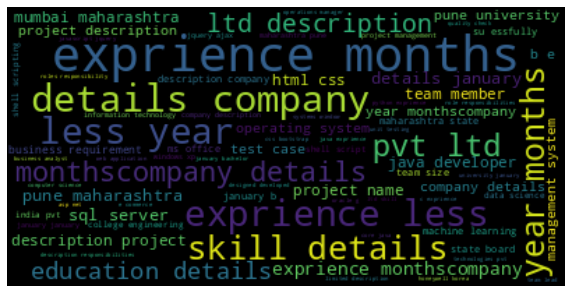

In [9]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
# create list of all categories
categories = np.sort(df['Category'].unique())
categories

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

In [11]:
# create new df for corpus and category
df_categories = [df[df['Category'] == category].loc[:, ['Resume', 'Category']] for category in categories]
df_categories

[                                                Resume  Category
 84   technical qualifications windows ms officeeduc...  Advocate
 85   education details b com b university clacutta ...  Advocate
 86   education details llb dibrugarh university adv...  Advocate
 87   education details november january llm masters...  Advocate
 88   skills knows english native speaker ielts over...  Advocate
 89   qualification introduction computer extraeduca...  Advocate
 90   skills natural languages proficient english hi...  Advocate
 91   skills legal writing efficient researcher lega...  Advocate
 92   good grasping quality skillful work education ...  Advocate
 93   hard working quick learnereducation details ju...  Advocate
 94   technical qualifications windows ms officeeduc...  Advocate
 95   education details b com b university clacutta ...  Advocate
 96   education details llb dibrugarh university adv...  Advocate
 97   education details november january llm masters...  Advocate
 98   skil

<a id="barchart"></a>
## Bar Chart

The bar chart shows the number of records for each category, where class imbalanced is spotted easily.

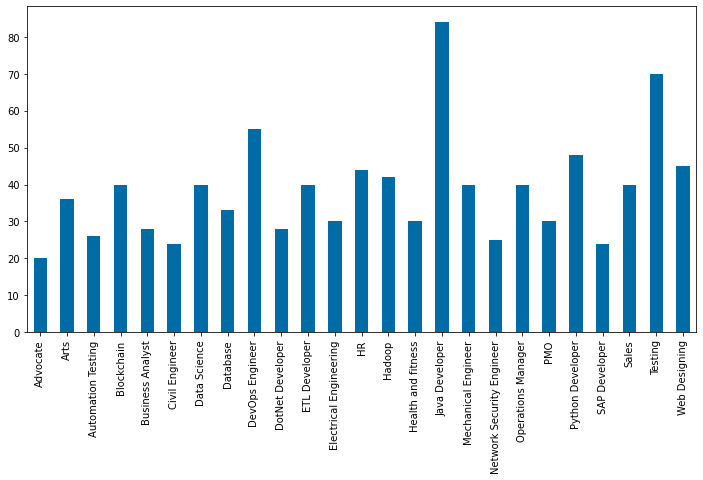

In [12]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

<a id="wordcloud"></a>
## Word Cloud

After word clouds are created, the word "manag" (inflected for "manage") prominently visible on many categories. Moreover, words like "citi", "state" and "compani" are noticeable on different categories as well. These common words are likely to contain low weight for computation. On the other hand, words like "account", "develop" and "design" probably has higher weight for calculation because it only appears on specific domains.

In [13]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

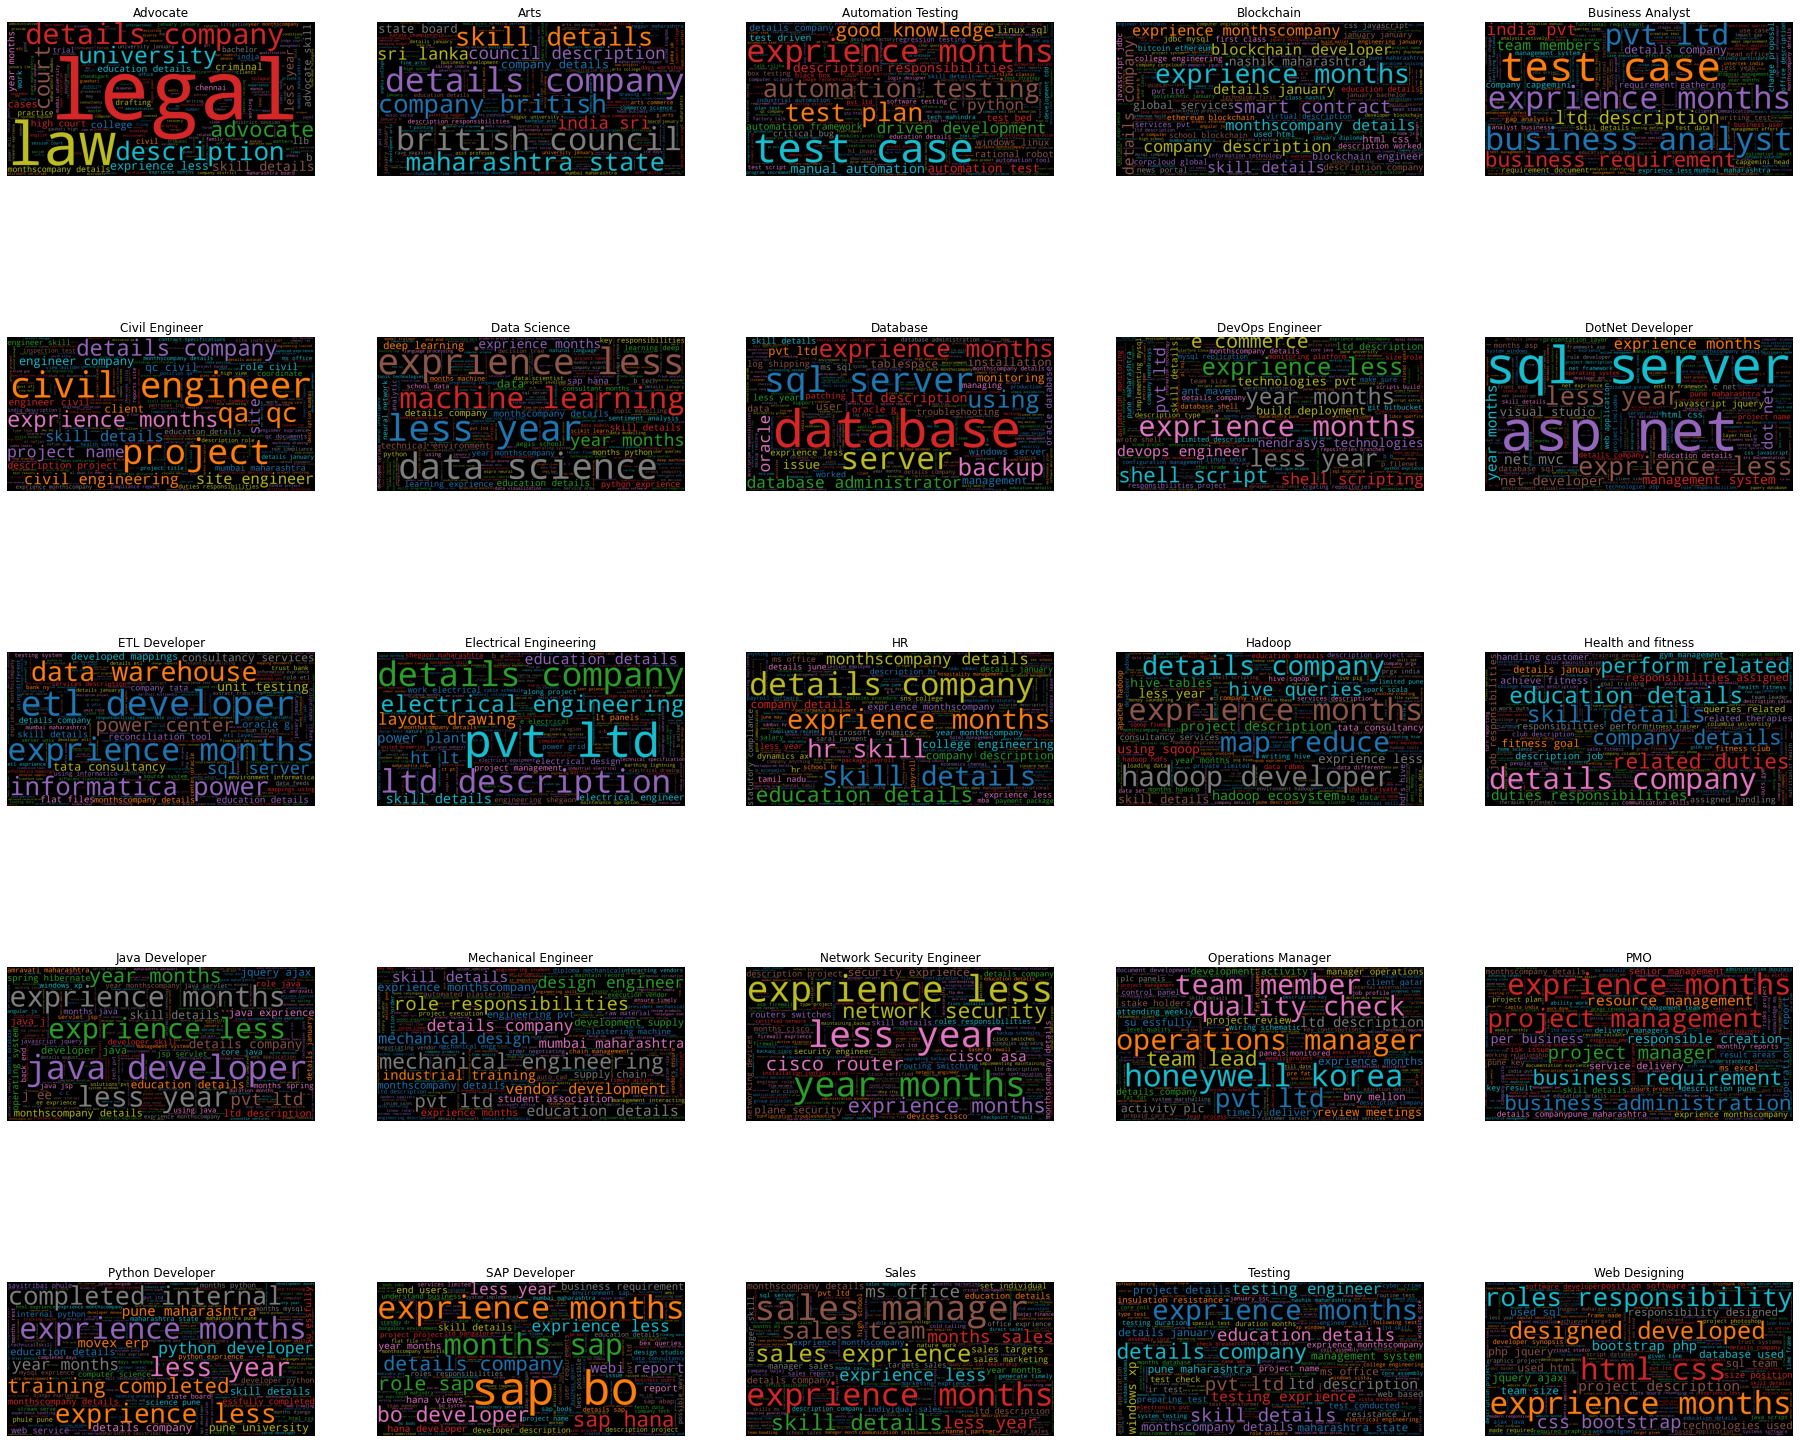

In [14]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

<a id="wordfreq"></a>
## Word Frequency Table

Word frequency is plotted to visualize how often popular words are used. Most categories have similar distribution on top 10 frequently used words.

In [15]:
def wordfreq(df):
    count = df['Resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

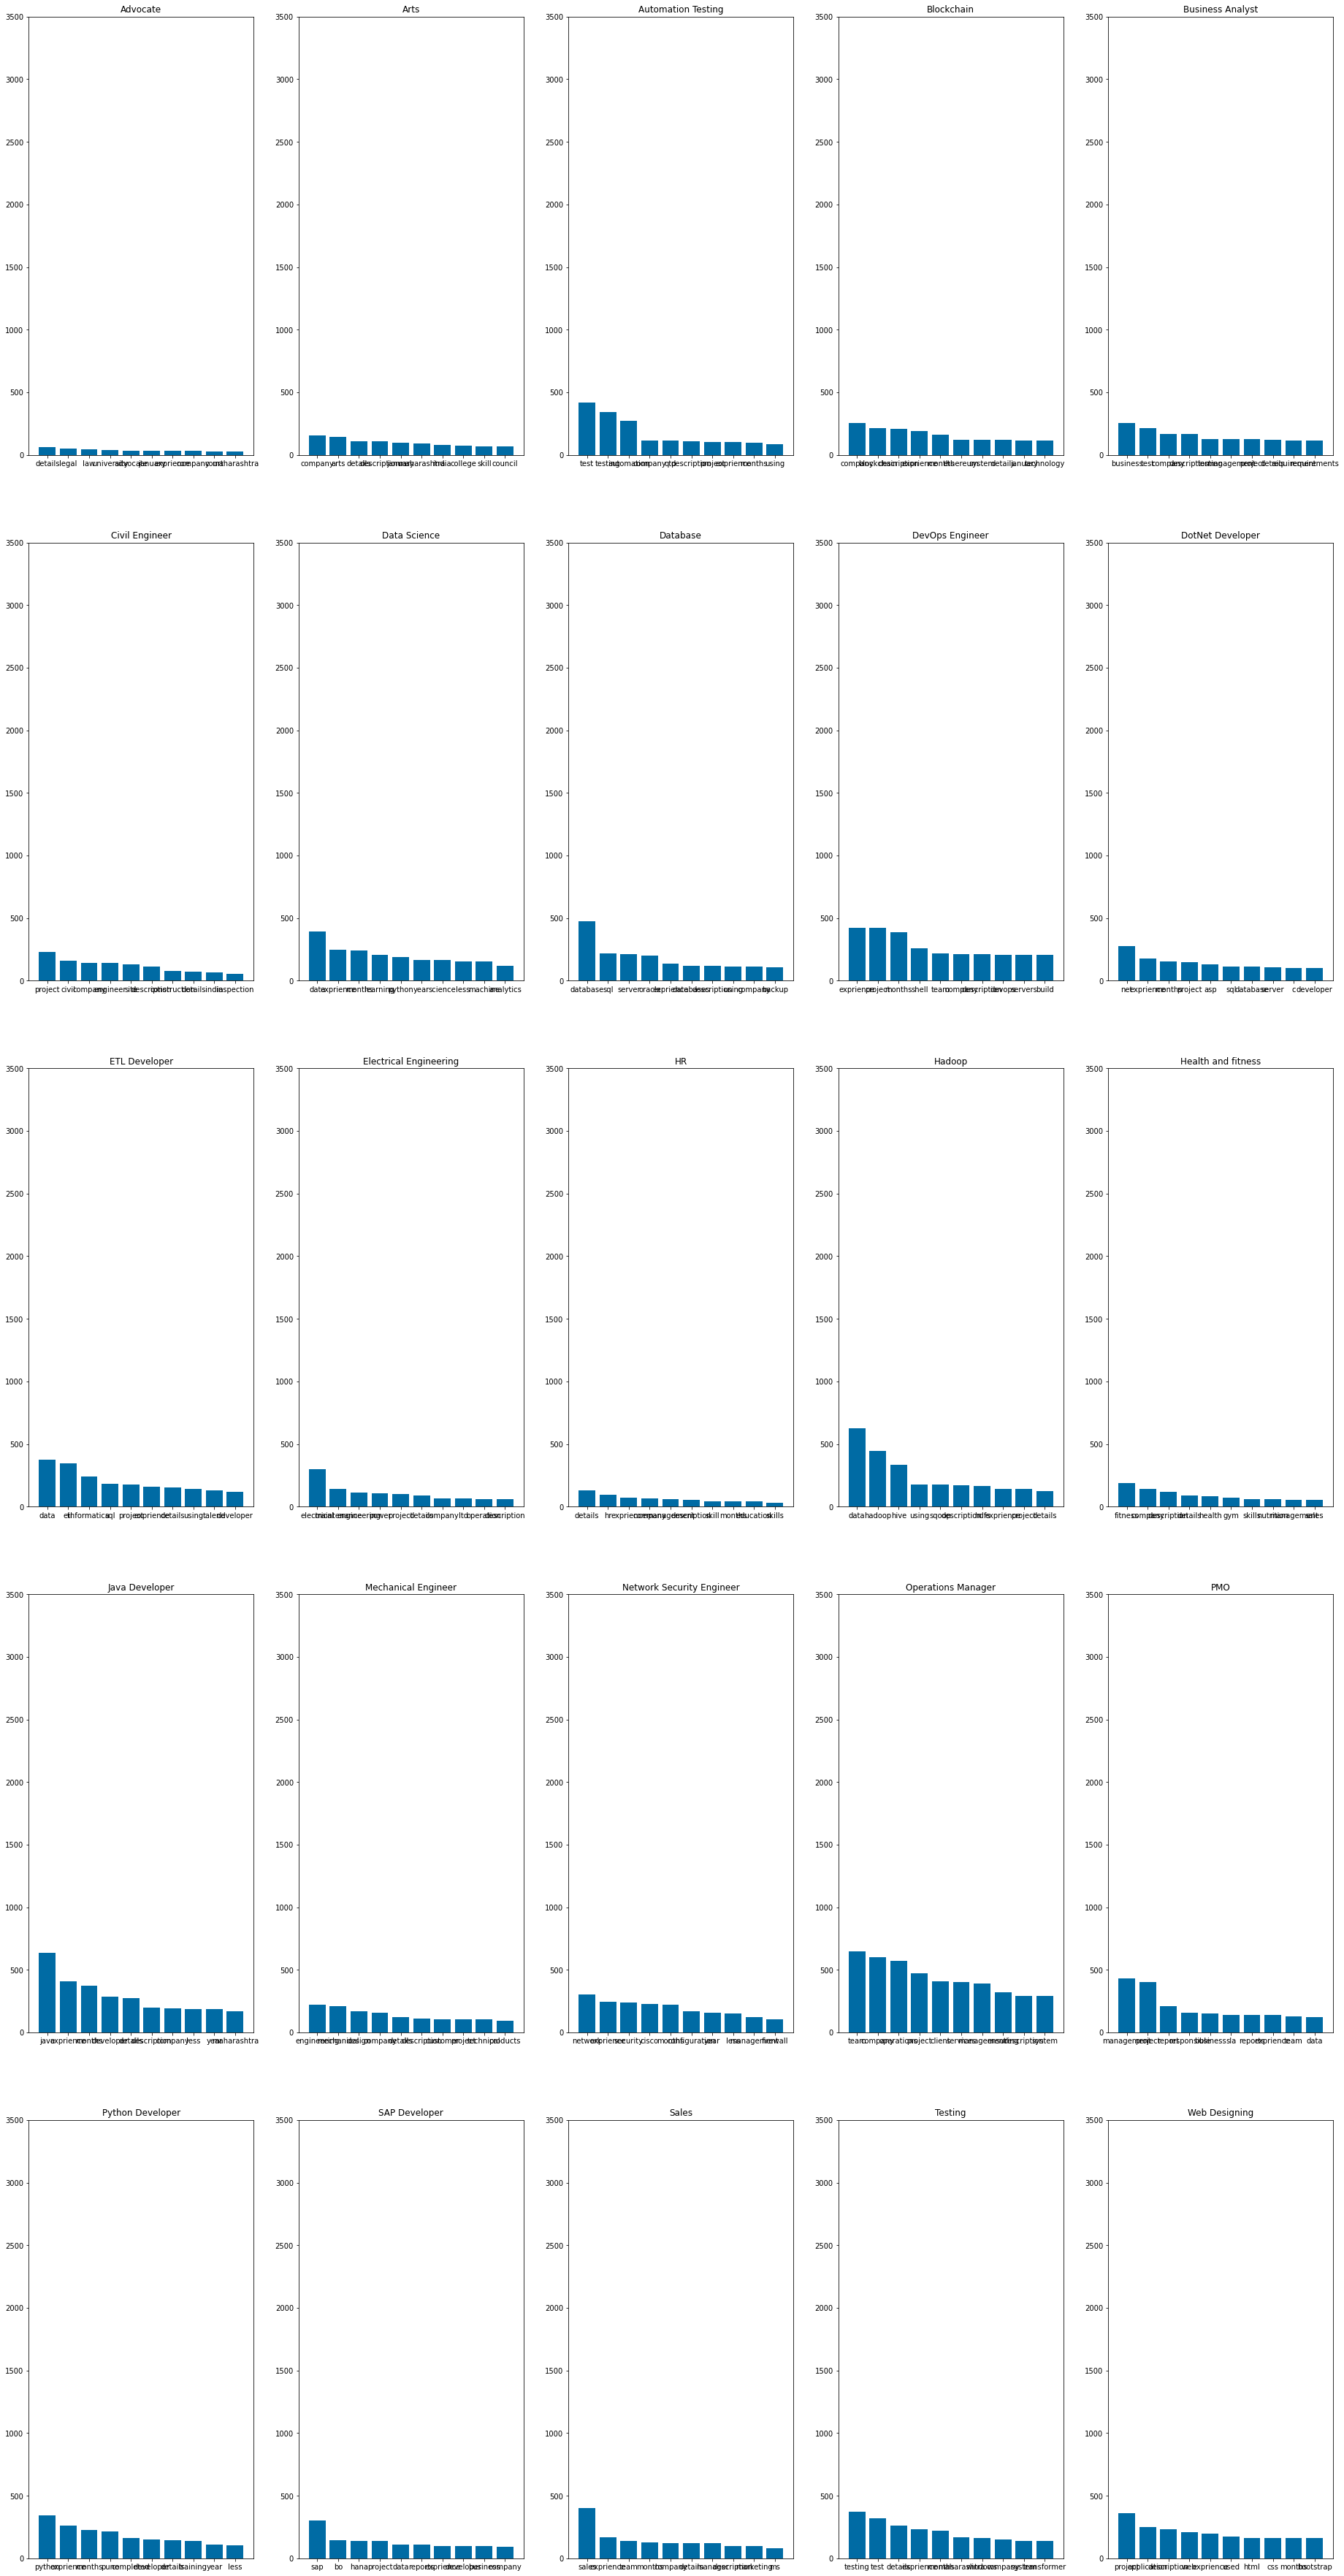

In [16]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()

In [17]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [18]:
df

,Category,Resume
0,6,skills programming languages python pandas num...
1,6,education details may may b e uit rgpv data sc...
2,6,areas interest deep learning control system de...
3,6,skills r python sap hana tableau sap hana sql ...
4,6,education details mca ymcaust faridabad haryan...
...,...,...
957,23,computer skills proficient ms office word basi...
958,23,willingness ept challenges positive thinking g...
959,23,personal skills quick learner eagerness learn ...
960,23,computer skills software knowledge ms power po...


In [19]:
df.Category.value_counts()


15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [20]:
#Remove Category with a few records (implanced data)
#df = df[df.Category != 2]
#df = df[df.Category != 5]
#df = df[df.Category != 8]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['Resume'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")



Feature completed .....


In [22]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(769, 7015)
(193, 7015)


In [23]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.98
Accuracy of KNeighbors Classifier on test set:     0.97


In [24]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       0.80      0.80      0.80         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       0.73      1.00      0.84         8
           7       1.00      0.86      0.92         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.

# **Deep Learning**

In [25]:
df = pd.read_csv('../input/CvsDatasets/ResumeDataSet.csv')
df['Resume'] = df['Resume'].apply(lambda w: preprocess(w))


In [26]:
from sklearn.utils import shuffle

features = df['Resume'].values
original_labels = df['Category'].values
labels = original_labels[:]

for i in range(len(df)):
    
    labels[i] = str(labels[i].lower())  # convert to lowercase
    labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens
    
features, labels = shuffle(features, labels)

# Print example feature and label
print(features[0])
print(labels[0])

computer skills software knowledge ms power point ms office c protius pcb design multisim micro wind matlab keil latex basic nternet fundamentals software hardware knowledge project details diploma project speed control dc motor using heart beats mini project water gardening system using solar panel final year project iris recognition system education details january education pune maharashtra pune university january ssc maharashtra board quality engineer quality engineer matrix technologies skill details matlab exprience months pcb exprience months pcb design exprience monthscompany details company matrix technologies description company rb electronics description
testing


In [27]:
# Split for train and test
train_split = 0.8
train_size = int(train_split * len(df))

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

# Print size of each split
print(len(train_labels))
print(len(test_labels))

769
193


In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize feature data
vocab_size = 6000
oov_tok = '<>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)

{'<>': 1, 'exprience': 2, 'company': 3, 'project': 4, 'months': 5, 'description': 6, 'details': 7, 'data': 8, 'management': 9, 'team': 10, 'maharashtra': 11, 'system': 12, 'testing': 13, 'year': 14, 'database': 15, 'development': 16, 'business': 17, 'ltd': 18, 'test': 19, 'less': 20, 'using': 21, 'sql': 22, 'skill': 23, 'january': 24, 'client': 25, 'java': 26, 'developer': 27, 'engineering': 28, 'application': 29, 'pune': 30, 'work': 31, 'c': 32, 'services': 33, 'skills': 34, 'education': 35, 'software': 36, 'pvt': 37, 'responsibilities': 38, 'sales': 39, 'reports': 40, 'process': 41, 'operations': 42, 'requirements': 43, 'server': 44, 'customer': 45, 'technical': 46, 'technologies': 47, 'university': 48, 'india': 49, 'monthscompany': 50, 'design': 51, 'working': 52, 'various': 53, 'python': 54, 'environment': 55, 'web': 56, 'college': 57, 'b': 58, 'engineer': 59, 'e': 60, 'automation': 61, 'like': 62, 'role': 63, 'time': 64, 'mysql': 65, 'support': 66, 'windows': 67, 'based': 68, 'tec

In [29]:
# Tokenize label data 
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)

{'javadeveloper': 1, 'testing': 2, 'devopsengineer': 3, 'pythondeveloper': 4, 'webdesigning': 5, 'hr': 6, 'hadoop': 7, 'etldeveloper': 8, 'blockchain': 9, 'mechanicalengineer': 10, 'operationsmanager': 11, 'sales': 12, 'datascience': 13, 'arts': 14, 'database': 15, 'healthandfitness': 16, 'pmo': 17, 'electricalengineering': 18, 'dotnetdeveloper': 19, 'businessanalyst': 20, 'automationtesting': 21, 'networksecurityengineer': 22, 'civilengineer': 23, 'sapdeveloper': 24, 'advocate': 25}


In [30]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

print(train_feature_padded[0])
print(test_feature_padded[0])

[  84   34   36   72   95  132  357   95  119   32 3443 1684   51 1849
 1520 3444  926 3445 3446  292 3447 2184   36  588   72    4    7  197
    4 2120  108 1685  703   21 2909 3448 2408    4 1063 3449   12   21
 1663  364  832   14    4 3450 1182   12   35    7   24   35   30   11
   30   48   24  351   11  186   73   59   73   59  718   47   23    7
  926    2    5 1684    2    5 1684   51    2   50    7    3  718   47
    6    3 3451  281    6    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [31]:
# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=1),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(26, activation='softmax')
])

model.summary()

2022-05-18 22:16:16.916111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 22:16:17.096914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 22:16:17.097710: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-18 22:16:17.099558: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 64)             384000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 26)                1690      
Total params: 459,994
Trainable params: 459,994
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)

# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

In [33]:
# Train the neural network
num_epochs = 12

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/12


2022-05-18 22:16:20.201410: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-18 22:16:23.615663: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


25/25 - 6s - loss: 3.2148 - accuracy: 0.1638 - val_loss: 3.0990 - val_accuracy: 0.2124
Epoch 2/12
25/25 - 1s - loss: 2.9026 - accuracy: 0.1912 - val_loss: 2.7060 - val_accuracy: 0.2902
Epoch 3/12
25/25 - 1s - loss: 2.4299 - accuracy: 0.2900 - val_loss: 2.2762 - val_accuracy: 0.3212
Epoch 4/12
25/25 - 1s - loss: 1.8887 - accuracy: 0.3901 - val_loss: 1.7452 - val_accuracy: 0.4663
Epoch 5/12
25/25 - 1s - loss: 1.3670 - accuracy: 0.6229 - val_loss: 1.3029 - val_accuracy: 0.6062
Epoch 6/12
25/25 - 1s - loss: 0.9952 - accuracy: 0.7516 - val_loss: 0.9851 - val_accuracy: 0.7824
Epoch 7/12
25/25 - 1s - loss: 0.8574 - accuracy: 0.7763 - val_loss: 0.7806 - val_accuracy: 0.8238
Epoch 8/12
25/25 - 1s - loss: 0.6362 - accuracy: 0.8479 - val_loss: 0.6152 - val_accuracy: 0.8964
Epoch 9/12
25/25 - 1s - loss: 0.4466 - accuracy: 0.9428 - val_loss: 0.3954 - val_accuracy: 0.9275
Epoch 10/12
25/25 - 1s - loss: 0.2747 - accuracy: 0.9675 - val_loss: 0.2736 - val_accuracy: 0.9430
Epoch 11/12
25/25 - 1s - loss:

In [34]:
score = model.evaluate(test_feature_padded, test_label_sequences, verbose=1)

7/7 [==============================] - 0s 11ms/step - loss: 0.1828 - accuracy: 0.9689


In [35]:
print("Test Accuracy:", score[1])

Test Accuracy: 0.9689119458198547


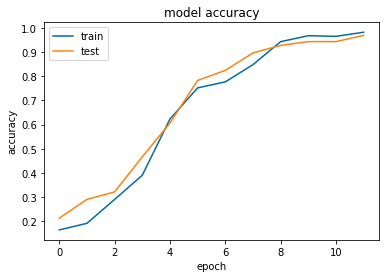

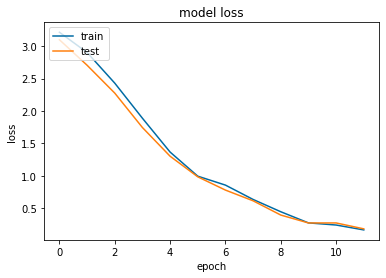

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# **Resume Parsing**

In [37]:
!pip install tika

  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32891 sha256=481d10c5ae19d12e8a9554beb2b926981c664d12aa2d37b4e0efc4c226f8c831
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika


In [38]:
from tika import parser

In [39]:
file = r'../input/resume-dataset/data/data/CONSTRUCTION/10100240.pdf'
file_data = parser.from_file(file)

2022-05-18 22:16:45,861 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2022-05-18 22:16:49,271 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2022-05-18 22:16:50,241 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [40]:
text = file_data['content']
print(text)




































CARPENTER APPRENTICE
Professional Summary

Former construction and carpentry worker committed to high-quality workmanship and safe environments. Over 4 years of hands-on experience
working with remodeling projects in residential and commercial construction. Dedicated work ethic and exceptional attendance record. I am
motivated to learn new trades and skills. Interested in growing career and fostering leadership capabilities. Professional Construction Laborer with
excellent interpersonal skills. Works in timely and efficient manner to see tough jobs through to completion.

Skills
Cabinetry
Material prepping
Construction drawing interpretation
Carpentry techniques
Oral and written communication

Materials handling
New construction and renovation
Drywalling
Safety and compliance

Work History
Carpenter Apprentice , 10/2017 to 09/2019 
Company Name â€“ City , State 

Assisted with movement of materials and equipment to job sites
Worked with master carpent

In [41]:
parsed_content = {}

In [42]:
#E-MAIL
import re
def get_email_addresses(string):
    r = re.compile(r'[\w\.-]+@[\w\.-]+')
    return r.findall(string)

email = get_email_addresses(text)
print(email)
parsed_content['E-mail'] = email

[]


In [43]:
#PHONE NUMBER
import re
def get_phone_numbers(string):
    r = re.compile(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')
    phone_numbers = r.findall(string)
    return [re.sub(r'\D', '', num) for num in phone_numbers]

phone_number= get_phone_numbers(text)
if len(phone_number) <= 10:
    print(phone_number)
    parsed_content['Phone number'] = phone_number

[]


In [44]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

def extract_name(text):
   nlp_text = nlp(text)
  
   # First name and Last name are always Proper Nouns
   pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
  
   matcher.add('NAME', [pattern], on_match = None)
  
   matches = matcher(nlp_text)
  
   for match_id, start, end in matches:
       span = nlp_text[start:end]
       return span.text

name = extract_name(text)
print(name)
parsed_content['Name'] =  name

CARPENTER APPRENTICE


In [45]:
Keywords = ["education",
            "summary",
            "accomplishments",
            "executive profile",
            "professional profile",
            "personal profile",
            "work background",
            "academic profile",
            "other activities",
            "qualifications",
            "experience",
            "interests",
            "skills",
            "achievements",
            "publications",
            "publication",
            "certifications",
            "workshops",
            "projects",
            "internships",
            "trainings",
            "hobbies",
            "overview",
            "objective",
            "position of responsibility",
            "jobs"
           ]

In [46]:
text = text.replace("\n"," ")
text = text.replace("[^a-zA-Z0-9]", " ");  
re.sub('\W+','', text)
text = text.lower()
print(text)

                                   carpenter apprentice professional summary  former construction and carpentry worker committed to high-quality workmanship and safe environments. over 4 years of hands-on experience working with remodeling projects in residential and commercial construction. dedicated work ethic and exceptional attendance record. i am motivated to learn new trades and skills. interested in growing career and fostering leadership capabilities. professional construction laborer with excellent interpersonal skills. works in timely and efficient manner to see tough jobs through to completion.  skills cabinetry material prepping construction drawing interpretation carpentry techniques oral and written communication  materials handling new construction and renovation drywalling safety and compliance  work history carpenter apprentice , 10/2017 to 09/2019  company name â€“ city , state   assisted with movement of materials and equipment to job sites worked with master carpent

In [47]:
content = {}
indices = []
keys = []
for key in Keywords:
    try:
        content[key] = text[text.index(key) + len(key):]
        indices.append(text.index(key))
        keys.append(key)
    except:
        pass
    

In [48]:
#Sorting the indices
zipped_lists = zip(indices, keys)
sorted_pairs = sorted(zipped_lists)
sorted_pairs

tuples = zip(*sorted_pairs)
indices, keys = [ list(tuple) for tuple in  tuples]
keys

['summary',
 'experience',
 'projects',
 'skills',
 'jobs',
 'objective',
 'education']

In [49]:
#Keeping the required content and removing the redundant part
content = []
for idx in range(len(indices)):
    if idx != len(indices)-1:
        content.append(text[indices[idx]: indices[idx+1]])
    else:
        content.append(text[indices[idx]: ])

In [50]:
for i in range(len(indices)):
    parsed_content[keys[i]] = content[i]  

In [51]:
parsed_content

{'E-mail': [],
 'Phone number': [],
 'Name': 'CARPENTER APPRENTICE',
 'summary': 'summary  former construction and carpentry worker committed to high-quality workmanship and safe environments. over 4 years of hands-on ',
 'experience': 'experience working with remodeling ',
 'projects': 'projects in residential and commercial construction. dedicated work ethic and exceptional attendance record. i am motivated to learn new trades and ',
 'skills': 'skills. interested in growing career and fostering leadership capabilities. professional construction laborer with excellent interpersonal skills. works in timely and efficient manner to see tough ',
 'jobs': 'jobs through to completion.  skills cabinetry material prepping construction drawing interpretation carpentry techniques oral and written communication  materials handling new construction and renovation drywalling safety and compliance  work history carpenter apprentice , 10/2017 to 09/2019  company name â€“ city , state   assisted wit

In [52]:
pd.DataFrame(parsed_content.items()) 

,0,1
0,E-mail,[]
1,Phone number,[]
2,Name,CARPENTER APPRENTICE
3,summary,summary former construction and carpentry wor...
4,experience,experience working with remodeling
5,projects,projects in residential and commercial constru...
6,skills,skills. interested in growing career and foste...
7,jobs,jobs through to completion. skills cabinetry ...
8,objective,objectives gathered and disposed of work site ...
9,education,education high school diploma : 04/2010 buffa...
